<a href="https://colab.research.google.com/github/vpagonis/CRCbook/blob/main/Chapter_11_Partial_Differential_Equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 11 - Partial Differential Equations

This notebook contains the code for the example problems found in Chapter 11.

**Example 11.1: The general solution of the heat flow equation in 1D**

In [1]:
%reset -f

print('-'*28,'CODE OUTPUT','-'*29,'\n')

from sympy import  Eq, Function, pde_separate, diff,\
Derivative as D, dsolve, symbols

# Define symbols including integration constants C1, C2
a, t, k = symbols('a, t, k',positive=True, real=True)
x, y, C1, C2 =symbols('x, y, C1, C2')

# define function T(t), X(x) and F(x,t)
T, X, F = map(Function, 'TXF')

# Solve the heat flow equation using sparataion of variables
eq = Eq(D(T(x, t), x, 2), (1/a**2)*D(T(x, t), t))
soln = pde_separate(eq, T(x, t), [X(x), F(t)], strategy='mul')

print('The separated form of the Laplace equations is:\n')
print(soln)

solX = dsolve(soln[0]+k**2, X(x))

print('\nThe solution X(x) =', solX.rhs)

solF = dsolve(soln[1]+k**2, F(t))
# Absorb the extra integration constant C, by setting C=1
solF = solF.subs(C1,1)
print('The solution F(t) =', solF.rhs)

sol = solX.rhs*solF.rhs
print('\nThe general solution is:')
print('      T(x,t) =', sol)

# Verify that symbolic solution satisfies heat flow equation
print('\nIs this T(x,t) a solution of the diffusion equation? ',\
      diff(sol,x,2) == (1/a**2)*diff(sol,t))

---------------------------- CODE OUTPUT ----------------------------- 

The separated form of the Laplace equations is:

[Derivative(X(x), (x, 2))/X(x), Derivative(F(t), t)/(a**2*F(t))]

The solution X(x) = C1*sin(k*x) + C2*cos(k*x)
The solution F(t) = exp(-a**2*k**2*t)

The general solution is:
      T(x,t) = (C1*sin(k*x) + C2*cos(k*x))*exp(-a**2*k**2*t)

Is this T(x,t) a solution of the diffusion equation?  True


**Example 11.2: Plotting the particular solution of the heat equation**

---------------------------- CODE OUTPUT ----------------------------- 

Fourier coefficients bn = -50.0*(-1)**n/(pi*n)


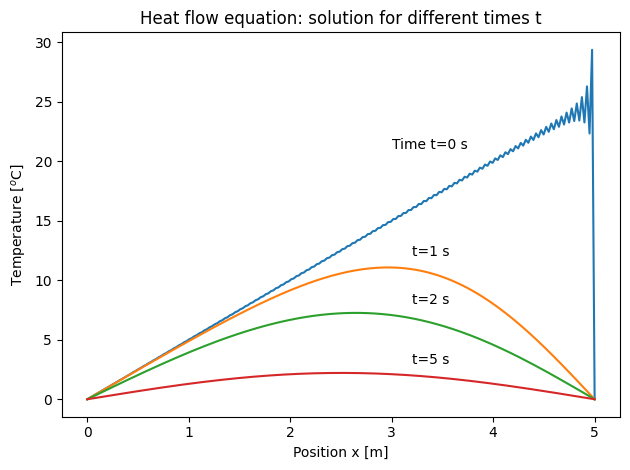

In [2]:
%reset -f

from sympy import symbols, integrate, sin, pi, lambdify
import numpy as np
import matplotlib.pyplot as plt

x = symbols('x')        # define symbols
n = symbols('n', integer = True, positive=True)

print('-'*28,'CODE OUTPUT','-'*29,'\n')

# function to evaluate temperature T(x,t) by summing the series T(x,t)
def T(t):
    suma = [0]*len(x)
    for i in range(1,numTerms):
        suma = suma+bn(i)*np.sin(i*np.pi*x/L)*np.exp(-(a*i*np.pi/L)**2*t)
    plt.plot(x,suma)

L = 5     # length of the rod
a = 1     # coefficient a in the diffusion equation (SI units)

# Find the sine Fourier coefficients of the functions 25*x/L
Bn = (2/L)* integrate(25*x/L*sin(n*pi*x/L),(x,0,L))
print("Fourier coefficients bn =",Bn)

# turn Bn into a function of n
bn = lambdify(n, Bn)

# Number of terms to be summed in the truncated Fourier series
numTerms = 200

# positions along the x-axis
x = np.linspace(0,L,200)

# call function to evaluate F(x,t) for different times t
times = [0,1,2,5]
for t in range(len(times)):
    T(times[t])

plt.text(3,21,'Time t=0 s')
plt.text(3.2,12,'t=1 s')
plt.text(3.2,8,'t=2 s')
plt.text(3.2,3,'t=5 s')
plt.title('Heat flow equation: solution for different times t')
plt.xlabel('Position x [m]')
plt.ylabel(r'Temperature [$^{o}$C]')
plt.tight_layout()
plt.show()

**Example 11.3: The product solution of the Laplace equation in 2D**

In [3]:
%reset -f

print('-'*28,'CODE OUTPUT','-'*29,'\n')

from sympy import  Eq, Function, pde_separate, diff,\
Derivative as D, dsolve, symbols

# define symbols and functions
k = symbols('k', positive=True, real=True)
u, X, Y = map(Function, 'uXY')
x, y, C1, C2, C3, C4 = symbols('x, y, C1, C2, C3, C4')

# The Laplace PDE
eq = Eq(D(u(x, y), x, 2), -D(u(x, y), y, 2))

# use pde_separate() to separate the x and y variables
soln = pde_separate(eq, u(x, y), [X(x), Y(y)], strategy='mul')
print('The separated form of the Laplace equation is:')
print(soln)

# Solve the ODE for X(x) using dsolve()
solX = dsolve(soln[0]-k**2, X(x))
print('\nThe solution X(x) =', solX.rhs)

# Solve the ODE for Y(y) using dsolve()
solY = dsolve(soln[1]-k**2, Y(y))

# Replace constants C1, C2 in Y(y) with C3, C4 to avoid confusion
solY = solY.subs({C1:C3,C2:C4})

# print the function Y(y)
print('\nThe solution Y(y) =', solY.rhs)

# print combined solution X(x)*Y(y)
sol = solX.rhs*solY.rhs
print('\nThe general solution is')
print('u(x,y) =', sol)

print('\nIs this u(x,y) function a solution of the Laplace equation? ',\
diff(sol,x,2) == -diff(sol,y,2))

---------------------------- CODE OUTPUT ----------------------------- 

The separated form of the Laplace equation is:
[Derivative(X(x), (x, 2))/X(x), -Derivative(Y(y), (y, 2))/Y(y)]

The solution X(x) = C1*exp(-k*x) + C2*exp(k*x)

The solution Y(y) = C3*sin(k*y) + C4*cos(k*y)

The general solution is
u(x,y) = (C1*exp(-k*x) + C2*exp(k*x))*(C3*sin(k*y) + C4*cos(k*y))

Is this u(x,y) function a solution of the Laplace equation?  True


**Example 11.4: Plotting the solution of the Laplace equation**

---------------------------- CODE OUTPUT ----------------------------- 

Fourier coefficients bn= 2.0*(1 - (-1)**n)/(pi*n)


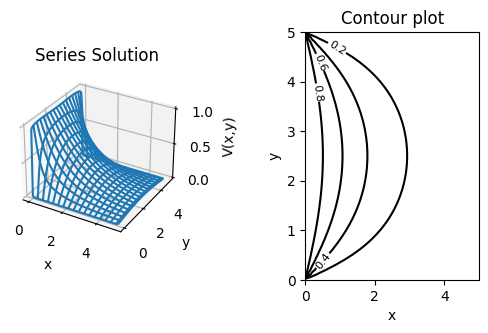

In [4]:
%reset -f

from sympy import symbols, integrate, sin, pi, lambdify, simplify
import numpy as np
import matplotlib.pyplot as plt

print('-'*28,'CODE OUTPUT','-'*29,'\n')

x = symbols('x ')        # define symbols
n = symbols('n', integer = True, positive=True)

Vo = 1    # potential Vo=V(0,y)

L = 5     # length along the x-axis (SI units)

# Find the sine Fourier coefficients of the functions 25*x/L
Bn = (2/L)* integrate(Vo*sin(n*pi*x/L),(x,0,L))
print("Fourier coefficients bn=",simplify(Bn))

# turn Bn into a function of n
bn = lambdify(n, Bn)

# Number of terms to be summed in the truncated Fourier series
numTerms = 200

#Define the function V(x,y)
def V(x, y):
    suma = [0]*len(y)
    for i in range(1,numTerms):
        suma = suma+bn(i)*np.exp(-i*np.pi*x/L)*np.sin(i*np.pi*y/L)
    return suma

# positions along the x-axis and the y-axis
x = np.linspace(0,L,50)
y = np.linspace(0,L,50)
X, Y = np.meshgrid(x, y)
Z = V(X,Y)

# define the objects fig and axes for 3D plotting
# plot 3D surface as wireframe

fig = plt.figure()
ax1 = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122)

ax1.plot_wireframe(X, Y, Z, rstride=3, cstride=3)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('V(x,y)')
ax1.set_title('Series Solution')

#plot the contours
cp = ax2.contour(X,Y,Z, levels=[ 0.2,0.4,0.6,0.8], colors='k')
ax2.clabel(cp, inline=True, fontsize=8, colors = 'k')
ax2.set_title('Contour plot')
ax2.set_ylabel('y')
ax2.set_xlabel('x')
#ax2.set_xbound(-0.5,6)

plt.tight_layout(pad = 6.0)
plt.show()


**Example 11.5: Solving the wave equation**

In [5]:
%reset -f

from sympy import  Eq, Function, Derivative as D,dsolve,\
  symbols,  pde_separate, diff

print('-'*28,'CODE OUTPUT','-'*29,'\n')

# define functions and symbols
u, X, T = symbols('y, X, T', cls=Function)

v, k, omega =symbols('v, k, omega',positive=True)

t, x, C1, C2, C3, C4 =symbols('t, x, C1, C2, C3, C4')

# this is the 1D wave equation
eq = Eq(v**2*D(u(x,t), x,2)-D(u(x,t),t,2), 0)

# use pde_separate() to separate the x and y variables
soln = pde_separate(eq, u(x, t), [X(x), T(t)], strategy='mul')
print('The separated form of the Laplace equation is:')
print(soln)

# Solve the ODE for X(x) using dsolve()
solX = dsolve(soln[0]+k**2, X(x))
print('\nThe solution X(x) =', solX.rhs)

# Solve the ODE for Y(y) using dsolve()
solY = dsolve(soln[1]+k**2, T(t))

# Replace constants C1, C2 in Y(y) with C3, C4 to avoid confusion
solY = solY.subs({C1:C3,C2:C4})

# print the function Y(y)
print('\nThe solution Y(y) =', solY.rhs)

# print combined solution X(x)*Y(y)
sol = solX.rhs*solY.rhs
print('\nThe general solution is')
print('u(x,y)=', sol)

print('\nIs this u(x,t) function a solution of the wave equation? ',\
      diff(sol,x,2) == diff(sol,t,2)/v**2)

---------------------------- CODE OUTPUT ----------------------------- 

The separated form of the Laplace equation is:
[Derivative(X(x), (x, 2))/X(x), Derivative(T(t), (t, 2))/(v**2*T(t))]

The solution X(x) = C1*sin(k*x) + C2*cos(k*x)

The solution Y(y) = C3*sin(k*t*v) + C4*cos(k*t*v)

The general solution is
u(x,y)= (C1*sin(k*x) + C2*cos(k*x))*(C3*sin(k*t*v) + C4*cos(k*t*v))

Is this u(x,t) function a solution of the wave equation?  True


**Example 11.6: Plotting the solution of the wave equation at different times**

---------------------------- CODE OUTPUT ----------------------------- 

Fourier coefficients bn= 12.5*sin(pi*n/5)/(pi**2*n**2)


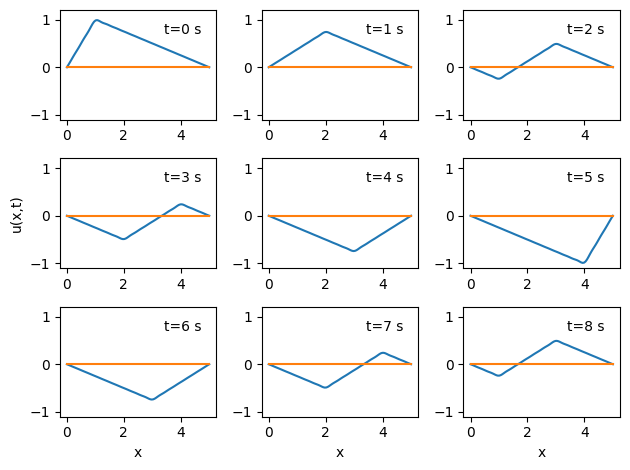

In [6]:
%reset -f

from sympy import  pi, integrate, simplify, symbols, sin
from sympy.utilities.lambdify import lambdify
import numpy as np
import matplotlib.pyplot as plt

n = symbols('n', integer=True, positive=True)
x = symbols('x')

print('-'*28,'CODE OUTPUT','-'*29,'\n')

# function to evaluate displacement by summing the series y(x,t)
def F(t):
    suma = [0]*len(x)
    for i in range(1,numTerms):
        suma = suma+bn(i)*np.sin(i*np.pi*x/L)*\
            np.cos((i*np.pi/L)*v*t)
    return suma

L = 5    # length of string
v = 1    # speed of the wave

# Find the sine Fourier coefficients of the triangular function
Bn = (2/L)*integrate(x* sin(n*pi*x/L),(x,0,1))+\
    (2/L)*integrate((1.25-.25*x)* sin(n*pi*x/L),(x,1,5))

print("Fourier coefficients bn=",simplify(Bn))

# turn Bn into a function of n
bn = lambdify(n, Bn)

# Number of terms to be summed in the truncated Fourier series
numTerms = 30

# positions along the x-axis
x = np.linspace(0,5,100)

# call function F(t) to evaluate series u(x,t) for times t=0-8s
times = np.arange(0,9,1)

for i in range(len(times)):
    plt.subplot(3,3,times[i]+1)
    plt.plot(x,F(times[i]))
    plt.ylim(-1.1,1.2)
    plt.plot(x,[0]*len(x))
    plt.text(3.4,.7,'t='+str(times[i])+' s')
    if i>5:
        plt.xlabel('x')
    if i==3:
       plt.ylabel('u(x,t)')

plt.tight_layout()
plt.show()


**Example 11.7: Electric potential of a charged cylinder**

---------------------------- CODE OUTPUT ----------------------------- 

The first few zeros of the Bessel function are: 

[ 2.40482556  5.52007811  8.65372791 11.79153444 14.93091771 18.07106397
 21.21163663 24.35247153 27.49347913 30.63460647]


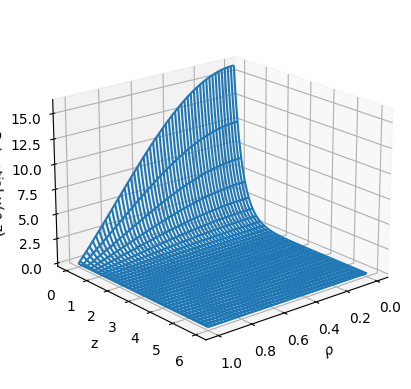

In [7]:
%reset -f

from scipy.special import jv, jn_zeros
import matplotlib.pyplot as plt
import numpy as np

num_terms = 10
a = 1

print('-'*28,'CODE OUTPUT','-'*29,'\n')

km = jn_zeros(0,num_terms)
print('The first few zeros of the Bessel function are: \n')
print(km)

def u(x,y):
   suma = [0]*len(x)
   for i in range(0,num_terms):
    suma = suma + 20/(km[i] * jv(1,km[i])) * jv(0, km[i]*x/a) * \
        np.exp(-km[i]*y/a)
    return suma

rho = np.linspace(0, a, 100)
z = np.linspace(0,6,100)
R,Z = np.meshgrid(rho,z)
U = u(R,Z)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_wireframe(R, Z, U, rstride = 3, cstride = 2)
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('z')
ax.set_zlabel(r'Potential u($\rho$,z)')
ax.view_init(20, 50)

plt.show()

**Example 11.8: The electric potential due to a charged sphere**

In [8]:
%reset -f

from sympy import integrate, symbols, cos, sin, pi
from sympy.functions.special.polynomials import legendre

import numpy as np
import matplotlib.pyplot as plt

r, t,l = symbols('r,t,l')

a = 1
V0 = 1

def A(l):
    return (2*l + 1)/(2*a**l)*V0 *\
        integrate(legendre(l,cos(t))*(cos(t)**2)*sin(t), \
            (t,0,pi))

print('-'*28,'CODE OUTPUT','-'*29,'\n')

print('The Al coefficients for the potential V are:\n')
for l in range(0,5):
    print('A_'+str(l)+' =', round(A(l),2))

---------------------------- CODE OUTPUT ----------------------------- 

The Al coefficients for the potential V are:

A_0 = 0.33
A_1 = 0
A_2 = 0.67
A_3 = 0
A_4 = 0
